# Mega Case Study

## Part 1 - SOM

### Importing the libraries

In [1]:
!pip install minisom

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11720 sha256=ccc1ff42ec6a6f275a7e1fe1dec4714f0216abca0e4dd8acf711b4474ad54588
  Stored in directory: c:\users\rodrigo\appdata\local\pip\cache\wheels\ec\7e\00\ac334ebb21e9016a73bef195e9732606217c6894f96bd51e6f
Successfully built minisom


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the dataset

In [3]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### Feature Scaling

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

### Training the SOM

In [5]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

### Visualizing the results

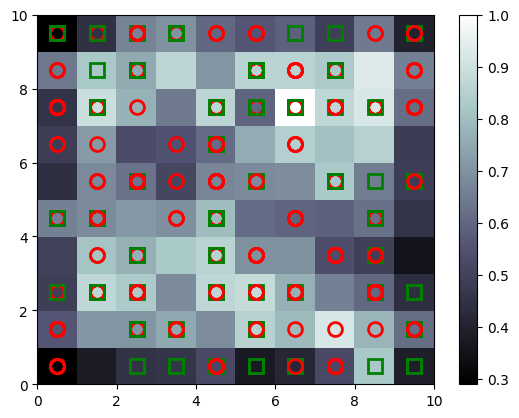

In [6]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

### Finding the frauds

In [7]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(6,8)], mappings[(5,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

### Printing the fraudulent clients

In [8]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15648069
15593959
15629750
15592999
15611409
15636454
15608916
15668679
15738487
15773421
15682686
15636521
15707602
15815095
15720725
15567834
15591035
15672912
15598614
15608804
15631267
15611189
15759387
15712483
15572361
15698522


## Part 2 - Going from Unsupervised to Supervised Deep Learning

### Creating the Matrix of Features

In [9]:
customers = dataset.iloc[:, 1:].values

### Creating the Dependent Variable

In [10]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_fraud[i] = 1

## Part 3 - ANN

### Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

### Building the ANN

In [12]:
import tensorflow as tf
tf.__version__

'2.18.0'

In [13]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN

In [14]:
ann.fit(customers, is_fraud, batch_size = 1, epochs = 10)

Epoch 1/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 696us/step - accuracy: 0.9582 - loss: 0.4443
Epoch 2/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - accuracy: 0.9654 - loss: 0.3145
Epoch 3/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - accuracy: 0.9534 - loss: 0.2547
Epoch 4/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.9648 - loss: 0.1795
Epoch 5/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - accuracy: 0.9591 - loss: 0.1693
Epoch 6/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - accuracy: 0.9616 - loss: 0.1434
Epoch 7/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - accuracy: 0.9546 - loss: 0.1378
Epoch 8/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.9585 - loss: 0.1222
Epoch 9/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - accuracy: 0.9637 - loss: 0.1142
Epoch 10/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - accuracy: 0.9772 - loss: 0.0811


### Predicting the test set results

In [15]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [16]:
print(y_pred)

[[1.57997850e+07 2.68794020e-06]
 [1.55805790e+07 6.36012010e-06]
 [1.56058720e+07 1.04676183e-05]
 ...
 [1.58150950e+07 2.24736810e-01]
 [1.57207250e+07 2.24736810e-01]
 [1.56876880e+07 2.24736810e-01]]
